In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

In [3]:
df = pd.read_csv(".../input/train.csv")

# EDA

In [5]:
df = df[df["Loan Sanction Amount (USD)"].notna()]
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [140]:
# df["Profession"].isna().values.any()

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
# df.corr()
df['Customer ID'] = df['Customer ID'].apply(lambda x: int(str(x).replace("C-","")))
len(df['Customer ID'].unique())

/home/vishal/miniconda3/envs/torpedo/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


29660

In [93]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [11]:
df.drop(columns=['Name','Gender','Dependents','No. of Defaults','Property Type'], inplace=True)

/home/vishal/miniconda3/envs/torpedo/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
# categorical = ['Income Stability','Profession',"Type of Employment",'Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
# encoder = LabelEncoder()
# for i in categorical:
#     label = encoder.fit_transform(df[i])
#     df[i] = label

# Missing Values handling

In [40]:
old_df = df
for col in df.columns:
    try:
        print("Column: ",col," Mean: ",df[col].mean()," Median: ",df[col].median())
        df[col] = df[col].fillna(df[col].median())
    except:
        print()
# plt.hist(df["Income (USD)"])
# plt.show() 

Column:  Customer ID  Mean:  25182.71149696561  Median:  25317.5
Column:  Age  Mean:  40.09922454484154  Median:  40.0
Column:  Income (USD)  Mean:  2630.990562641566  Median:  2223.3



/home/vishal/miniconda3/envs/torpedo/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """





Column:  Loan Amount Request (USD)  Mean:  88792.0572737683  Median:  75114.08499999999
Column:  Current Loan Expenses (USD)  Mean:  400.89375241582565  Median:  375.09


Column:  Credit Score  Mean:  739.85347481243  Median:  739.815

Column:  Property ID  Mean:  501.88182737693865  Median:  504.0
Column:  Property Age  Mean:  2631.317284738969  Median:  2223.965

Column:  Co-Applicant  Mean:  -4.707788267026298  Median:  1.0
Column:  Property Price  Mean:  131733.51717026386  Median:  109993.61
Column:  Loan Sanction Amount (USD)  Mean:  47649.34220836168  Median:  35209.395000000004


In [41]:
for col in df.columns:
    try:
        print("Column: ",col," Mean: ",df[col].mean()," Median: ",df[col].median())
#         df[col] = df[col].fillna(df[col].median())
    except:
        print()

Column:  Customer ID  Mean:  25182.71149696561  Median:  25317.5
Column:  Age  Mean:  40.09922454484154  Median:  40.0
Column:  Income (USD)  Mean:  2569.232177680171  Median:  2223.3




Column:  Loan Amount Request (USD)  Mean:  88792.0572737683  Median:  75114.08499999999
Column:  Current Loan Expenses (USD)  Mean:  400.7484649359383  Median:  375.09


Column:  Credit Score  Mean:  739.8513084963013  Median:  739.815

Column:  Property ID  Mean:  501.88182737693865  Median:  504.0
Column:  Property Age  Mean:  2565.9431486854032  Median:  2223.965

Column:  Co-Applicant  Mean:  -4.707788267026298  Median:  1.0
Column:  Property Price  Mean:  131733.51717026386  Median:  109993.61
Column:  Loan Sanction Amount (USD)  Mean:  47649.34220836168  Median:  35209.395000000004


In [116]:
# df.corr()
df["Property Location"].isna().sum(axis=0)

0

In [42]:
for col in ['Income Stability',"Type of Employment",'Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']:
    try:
        item_counts = df[col].value_counts()
        print("Column: ",col,"\n",item_counts)
        print()
#         print("Column: ",col," Mean: ",df[col].mean()," Median: ",df[col].median())
#         df[col] = df[col].fillna(df[col].median())
    except:
        print("Why here??")

Column:  Income Stability 
 Low     27116
High     2544
Name: Income Stability, dtype: int64

Column:  Type of Employment 
 Laborers                 5516
Sales staff              3698
Core staff               3189
Managers                 2464
Drivers                  1588
Accountants              1363
High skill tech staff    1297
Medicine staff            854
Security staff            574
Cooking staff             561
Cleaning staff            338
Private service staff     337
Secretaries               158
Low-skill Laborers        154
Waiters/barmen staff      148
Realty agents              85
IT staff                   77
HR staff                   71
Name: Type of Employment, dtype: int64

Column:  Location 
 Semi-Urban    21317
Rural          5280
Urban          3063
Name: Location, dtype: int64

Column:  Expense Type 1 
 N    18984
Y    10676
Name: Expense Type 1, dtype: int64

Column:  Expense Type 2 
 Y    19949
N     9711
Name: Expense Type 2, dtype: int64

Column:  Has Activ

# Missing Values Handling for Categorical Data 

In [43]:
df["Income Stability"].fillna("Low", inplace=True)
df["Property Location"].fillna("Semi-Urban", inplace=True)
df["Has Active Credit Card"].fillna("Active", inplace=True)

/home/vishal/miniconda3/envs/torpedo/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [142]:
# df.head()

In [84]:
# import dtale

In [83]:
# dtale.show(df)

# Filling Missing Values in "Type of Employement" Column Using Classification

In [45]:
training_data = df[df["Type of Employment"].notna()]
testing_data = df[df['Type of Employment'].isna()]

In [46]:
training_data

,Customer ID,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,36995,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,809.440,Active,746,1933.050,Rural,1,119933.46,54607.18
4,23459,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,745.550,Active,715,2614.770,Semi-Urban,1,208567.91,74008.28
5,17688,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,181.48,N,N,684.120,Inactive,491,1234.920,Rural,1,43146.82,22382.57
6,23855,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,697.67,Y,Y,637.290,Unpossessed,227,2361.560,Semi-Urban,1,221050.80,0.00
7,11006,45,2223.30,Low,State servant,Managers,Semi-Urban,240311.77,807.64,N,N,812.260,Active,314,2223.965,Urban,1,401040.70,168218.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29654,7813,39,2250.19,Low,Commercial associate,Managers,Rural,83810.38,430.66,Y,Y,739.815,Inactive,265,2250.190,Urban,1,129028.33,62857.78
29655,43723,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,Y,869.610,Unpossessed,566,4969.410,Urban,1,111096.56,68992.11
29656,32511,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,N,729.410,Inactive,175,1606.880,Urban,1,73453.94,46616.60
29657,5192,49,2223.30,Low,Working,Sales staff,Urban,81410.08,583.11,N,Y,739.815,Active,959,2223.965,Rural,1,102108.02,61057.56


In [15]:
testing_data

,Customer ID,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
1,33999,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,780.40,Unpossessed,608,4952.91,Rural,1,54791.00,37469.98
2,3770,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,833.15,Unpossessed,546,988.19,Urban,0,72440.58,36474.43
3,26480,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,832.70,Unpossessed,890,NaN,Semi-Urban,1,121441.51,56040.54
12,30073,48,777.25,Low,Working,NaN,Semi-Urban,96080.60,342.33,N,N,764.11,Active,678,777.25,Semi-Urban,1,146073.26,67256.42
13,34993,43,997.25,Low,Working,NaN,Rural,48894.06,178.06,Y,N,726.28,Active,578,997.25,Rural,1,80607.40,34225.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29636,27204,50,NaN,Low,Working,NaN,Semi-Urban,208937.85,650.19,N,Y,684.53,Active,133,NaN,Semi-Urban,1,253693.62,135809.60
29641,8444,62,1608.93,High,Pensioner,NaN,Semi-Urban,136973.99,432.53,N,Y,737.01,Inactive,395,1608.93,Rural,1,214606.95,89033.09
29647,31228,64,894.32,High,Pensioner,NaN,Rural,95407.12,341.52,N,N,741.68,Inactive,33,894.32,Semi-Urban,0,150221.60,66784.98
29649,7751,60,2344.28,High,Pensioner,NaN,Urban,191053.30,564.10,Y,Y,874.00,Inactive,208,2344.28,Urban,0,291421.81,143289.97


# Applying Label Encoding on Categorical Text Data

In [47]:
categorical = ['Income Stability','Profession',"Type of Employment",'Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
encoder = LabelEncoder()
for i in categorical:
    label = encoder.fit_transform(training_data[i])
    training_data[i] = label

/home/vishal/miniconda3/envs/torpedo/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
X_training = training_data.drop("Type of Employment", axis=1)
Y_training = training_data['Type of Employment']
X_training = X_training.drop("Customer ID", axis=1)

In [49]:
X_training

,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,56,1933.05,0,3,1,72809.58,241.08,0,0,809.440,0,746,1933.050,0,1,119933.46,54607.18
4,31,2614.77,0,3,1,113858.89,491.41,0,1,745.550,0,715,2614.770,1,1,208567.91,74008.28
5,60,1234.92,0,2,0,34434.72,181.48,0,0,684.120,1,491,1234.920,0,1,43146.82,22382.57
6,43,2361.56,0,3,1,152561.34,697.67,1,1,637.290,2,227,2361.560,1,1,221050.80,0.00
7,45,2223.30,0,2,1,240311.77,807.64,0,0,812.260,0,314,2223.965,2,1,401040.70,168218.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29654,39,2250.19,0,1,0,83810.38,430.66,1,1,739.815,1,265,2250.190,2,1,129028.33,62857.78
29655,38,4969.41,0,1,2,76657.90,722.34,1,1,869.610,2,566,4969.410,2,1,111096.56,68992.11
29656,20,1606.88,0,3,1,66595.14,253.04,0,0,729.410,1,175,1606.880,2,1,73453.94,46616.60
29657,49,2223.30,0,3,2,81410.08,583.11,0,1,739.815,0,959,2223.965,0,1,102108.02,61057.56


In [53]:
# X_training.corr()

In [51]:
X_training.drop("Income Stability",axis=1,inplace=True)

#### Since the classes in "Type of Employment" column are imbalanced we'll make it balanced by under sampling technique

In [54]:
class_count_0, class_count_1, class_count_2, class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8, class_count_9, class_count_10, class_count_11, class_count_12, class_count_13, class_count_14, class_count_15, class_count_16, class_count_17 = training_data['Type of Employment'].value_counts()

In [55]:
# class_count_0

5516

In [56]:
class_0 = training_data[training_data['Type of Employment'] == 0]
class_1 = training_data[training_data['Type of Employment'] == 1]
class_2 = training_data[training_data['Type of Employment'] == 2]
class_3 = training_data[training_data['Type of Employment'] == 3]
class_4 = training_data[training_data['Type of Employment'] == 4]
class_5 = training_data[training_data['Type of Employment'] == 5]
class_6 = training_data[training_data['Type of Employment'] == 6]
class_7 = training_data[training_data['Type of Employment'] == 7]
class_8 = training_data[training_data['Type of Employment'] == 8]
class_9 = training_data[training_data['Type of Employment'] == 9]
class_10 = training_data[training_data['Type of Employment'] == 10]
class_11 = training_data[training_data['Type of Employment'] == 11]
class_12 = training_data[training_data['Type of Employment'] == 12]
class_13 = training_data[training_data['Type of Employment'] == 13]
class_14 = training_data[training_data['Type of Employment'] == 14]
class_15 = training_data[training_data['Type of Employment'] == 15]
class_16 = training_data[training_data['Type of Employment'] == 16]
class_17 = training_data[training_data['Type of Employment'] == 17]

In [57]:
class_0_under = class_0.sample(150)
class_1_under = class_1.sample(150)
class_2_under = class_2.sample(150)
class_3_under = class_3.sample(150)
class_4_under = class_4.sample(150)
class_6_under = class_6.sample(150)
class_8_under = class_8.sample(150)
class_9_under = class_9.sample(150)
class_10_under = class_10.sample(150)
class_11_under = class_11.sample(150)
class_12_under = class_12.sample(150)
class_14_under = class_14.sample(150)
class_15_under = class_15.sample(150)
class_16_under = class_16.sample(150)

In [58]:
training_data_under = pd.concat([class_0_under,class_1_under,class_2_under,class_3_under,class_4_under,class_6_under,class_8_under,class_9_under,class_10_under,class_11_under,class_12_under,class_14_under,class_15_under,class_16_under,class_17,class_13,class_7,class_5], axis=0)

In [165]:
X_training = training_data_under.drop("Type of Employment", axis=1)
Y_training = training_data_under['Type of Employment']
X_training = X_training.drop("Customer ID", axis=1)
X_training = X_training.drop("Loan Sanction Amount (USD)", axis=1)

In [166]:
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_training, Y_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

## Predicting classes for missing values in "Type of Employment" column

In [67]:
categorical = ['Income Stability','Profession',"Type of Employment",'Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
encoder = LabelEncoder()
for i in categorical:
    label = encoder.fit_transform(testing_data[i])
    testing_data[i] = label

/home/vishal/miniconda3/envs/torpedo/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [167]:
X_testing = testing_data.drop("Type of Employment", axis=1)
Y_testing = testing_data['Type of Employment']
X_testing = X_testing.drop("Customer ID", axis=1)
X_testing = X_testing.drop("Loan Sanction Amount (USD)", axis=1)

In [192]:
X_training

,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price
21983,46,1927.73,0,3,1,75351.28,457.85,1,1,795.82,0,402,1927.730,1,1,102938.25
6730,46,2223.30,0,1,2,45449.00,280.01,1,1,863.06,2,226,2223.965,2,1,72048.35
12554,21,2948.05,0,1,0,150024.16,497.07,1,1,803.99,2,779,2948.050,2,1,191399.90
5786,48,1931.64,0,3,1,74651.80,369.70,0,1,722.46,2,567,1931.640,0,1,129370.03
23309,30,5676.06,0,1,2,201546.73,1954.26,0,1,814.78,2,103,5676.060,1,0,311529.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27513,19,2223.30,0,3,1,147146.77,704.89,0,1,841.60,2,685,2223.965,2,1,264574.12
28527,33,2195.68,0,2,1,108026.30,381.64,0,1,837.03,0,635,2195.680,0,1,203920.22
28574,40,1863.26,0,1,1,10563.00,84.65,0,1,731.42,1,101,1863.260,2,1,13568.34
28933,35,2634.17,0,3,1,130865.49,448.42,1,1,739.82,0,277,2634.170,2,1,231792.97


In [169]:
prediction = clf.predict(X_testing)

In [72]:
# for i in prediction:
#     print(i)

In [170]:
testing_data["Type of Employment"] = prediction

/home/vishal/miniconda3/envs/torpedo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
testing_data

,Customer ID,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
1,33999,32,4952.91,1,6,1,1,46837.47,495.81,0,1,780.40,2,608,4952.910,0,1,54791.00,37469.98
2,3770,65,988.19,0,2,1,1,45593.04,171.95,0,1,833.15,2,546,988.190,2,0,72440.58,36474.43
3,26480,65,2223.30,0,2,11,0,80057.92,298.54,0,1,832.70,2,890,2223.965,1,1,121441.51,56040.54
12,30073,48,777.25,1,6,5,1,96080.60,342.33,0,0,764.11,0,678,777.250,1,1,146073.26,67256.42
13,34993,43,997.25,1,6,8,0,48894.06,178.06,1,0,726.28,0,578,997.250,0,1,80607.40,34225.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29636,27204,50,2223.30,1,6,4,1,208937.85,650.19,0,1,684.53,0,133,2223.965,1,1,253693.62,135809.60
29641,8444,62,1608.93,0,2,0,1,136973.99,432.53,0,1,737.01,1,395,1608.930,0,1,214606.95,89033.09
29647,31228,64,894.32,0,2,13,0,95407.12,341.52,0,0,741.68,1,33,894.320,1,0,150221.60,66784.98
29649,7751,60,2344.28,0,2,6,2,191053.30,564.10,1,1,874.00,1,208,2344.280,2,0,291421.81,143289.97


In [172]:
final_data = pd.concat([training_data,testing_data],axis=0)

In [173]:
final_data

,Customer ID,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,36995,56,1933.05,0,3,14,1,72809.58,241.08,0,0,809.44,0,746,1933.050,0,1,119933.46,54607.18
4,23459,31,2614.77,0,3,6,1,113858.89,491.41,0,1,745.55,0,715,2614.770,1,1,208567.91,74008.28
5,17688,60,1234.92,0,2,15,0,34434.72,181.48,0,0,684.12,1,491,1234.920,0,1,43146.82,22382.57
6,23855,43,2361.56,0,3,8,1,152561.34,697.67,1,1,637.29,2,227,2361.560,1,1,221050.80,0.00
7,11006,45,2223.30,0,2,10,1,240311.77,807.64,0,0,812.26,0,314,2223.965,2,1,401040.70,168218.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29636,27204,50,2223.30,1,6,4,1,208937.85,650.19,0,1,684.53,0,133,2223.965,1,1,253693.62,135809.60
29641,8444,62,1608.93,0,2,0,1,136973.99,432.53,0,1,737.01,1,395,1608.930,0,1,214606.95,89033.09
29647,31228,64,894.32,0,2,13,0,95407.12,341.52,0,0,741.68,1,33,894.320,1,0,150221.60,66784.98
29649,7751,60,2344.28,0,2,6,2,191053.30,564.10,1,1,874.00,1,208,2344.280,2,0,291421.81,143289.97


In [174]:
final_data["Type of Employment"].isna().sum(axis=0)

0

# Applying Regression on Final Data

In [78]:
final_data.corr()

,Customer ID,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Customer ID,1.000000,0.001003,0.011091,-0.020530,-0.009290,-0.007933,-0.002713,-0.001074,0.021598,0.000615,0.004225,-0.003430,0.002535,0.011940,0.011292,-0.003860,0.049813,0.009893,-0.256939
Age,0.001003,1.000000,-0.009410,-0.039521,-0.048641,-0.071019,-0.016955,-0.010366,-0.023481,-0.045093,0.029883,0.126956,0.008116,-0.012820,-0.009505,0.003819,0.001577,-0.010132,0.008112
Income (USD),0.011091,-0.009410,1.000000,-0.000727,-0.013257,0.001332,0.026082,0.045779,0.050385,0.018989,0.004682,0.011610,-0.001840,-0.007456,0.999886,-0.000045,0.000714,0.046212,0.033811
Income Stability,-0.020530,-0.039521,-0.000727,1.000000,0.366525,-0.163517,0.024230,0.011943,0.012084,-0.006879,-0.011765,0.001925,-0.005945,-0.011964,-0.000717,0.001420,-0.003765,0.008297,0.015851
Profession,-0.009290,-0.048641,-0.013257,0.366525,1.000000,-0.045699,-0.114062,-0.069016,-0.067936,-0.007585,-0.011590,-0.087719,0.009821,-0.005414,-0.013095,-0.002174,-0.010732,-0.069893,-0.066465
Type of Employment,-0.007933,-0.071019,0.001332,-0.163517,-0.045699,1.000000,-0.012812,-0.030772,-0.008861,-0.014048,0.003589,-0.103284,-0.001450,0.008032,0.001292,-0.004749,-0.002109,-0.032105,-0.038297
Location,-0.002713,-0.016955,0.026082,0.024230,-0.114062,-0.012812,1.000000,0.104263,0.121579,0.022073,0.003576,0.130359,-0.015041,0.001561,0.025651,-0.001026,0.004071,0.100605,0.101299
Loan Amount Request (USD),-0.001074,-0.010366,0.045779,0.011943,-0.069016,-0.030772,0.104263,1.000000,0.681181,0.096446,-0.023976,0.172443,-0.026150,-0.009390,0.045228,0.006047,0.002188,0.948553,0.726408
Current Loan Expenses (USD),0.021598,-0.023481,0.050385,0.012084,-0.067936,-0.008861,0.121579,0.681181,1.000000,0.110371,0.014662,0.110927,-0.003673,-0.015991,0.049751,-0.001268,0.002467,0.647944,0.483610
Expense Type 1,0.000615,-0.045093,0.018989,-0.006879,-0.007585,-0.014048,0.022073,0.096446,0.110371,1.000000,0.025212,-0.047061,-0.009378,-0.000230,0.018624,0.000172,-0.005207,0.091592,0.055430


In [175]:
final_data = final_data[final_data["Loan Sanction Amount (USD)"]>=0]

In [176]:
X = final_data.drop(['Customer ID',"Loan Sanction Amount (USD)"],axis=1)
Y = final_data["Loan Sanction Amount (USD)"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

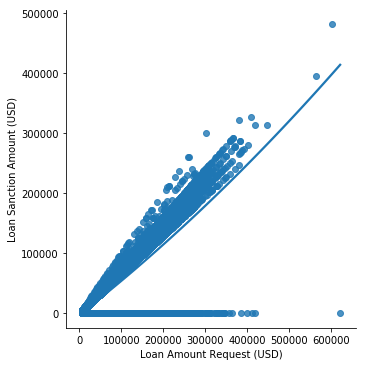

In [177]:
sns.lmplot(x ="Loan Amount Request (USD)", y ="Loan Sanction Amount (USD)", data = final_data,order = 2, ci = None)

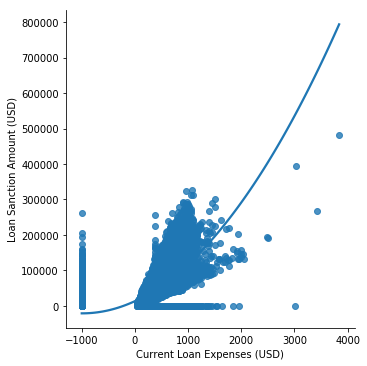

In [178]:
sns.lmplot(x ="Current Loan Expenses (USD)", y ="Loan Sanction Amount (USD)", data = final_data,order = 2, ci = None)

In [179]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [180]:
xgb_r.fit(X_train,y_train)

[02:37:44] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [181]:
pred = xgb_r.predict(X_test)
new_pred = []
for pred in y_pred:
    if pred<0:
        new_pred.append(0.0)
    else:
        new_pred.append(pred)
y_pred = new_pred
r2_score(y_test, y_pred)

0.7482733526460513

# Final Prediction

In [182]:
xgb_r_final = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb_r_final.fit(X,Y)

[02:37:57] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [199]:
prediction_data = pd.read_csv(".../input/test.csv")
prediction_data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,...,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.0
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,...,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,...,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,...,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [200]:
def preprocess(df,clf):
    df.drop(columns=['Name','Gender','Dependents','No. of Defaults','Property Type'], inplace=True)
    for col in df.columns:
        try:
            df[col] = df[col].fillna(df[col].median())
        except:
            pass
    df["Income Stability"].fillna("Low", inplace=True)
    df["Property Location"].fillna("Semi-Urban", inplace=True)
    df["Has Active Credit Card"].fillna("Active", inplace=True)
    categorical = ['Income Stability','Profession','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
    encoder = LabelEncoder()
    for i in categorical:
        label = encoder.fit_transform(df[i])
        df[i] = label
    return df

In [201]:
prediction_data = preprocess(prediction_data,clf)

In [168]:
X_testing

,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price
1,32,4952.91,1,6,1,46837.47,495.81,0,1,780.40,2,608,4952.910,0,1,54791.00
2,65,988.19,0,2,1,45593.04,171.95,0,1,833.15,2,546,988.190,2,0,72440.58
3,65,2223.30,0,2,0,80057.92,298.54,0,1,832.70,2,890,2223.965,1,1,121441.51
12,48,777.25,1,6,1,96080.60,342.33,0,0,764.11,0,678,777.250,1,1,146073.26
13,43,997.25,1,6,0,48894.06,178.06,1,0,726.28,0,578,997.250,0,1,80607.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29636,50,2223.30,1,6,1,208937.85,650.19,0,1,684.53,0,133,2223.965,1,1,253693.62
29641,62,1608.93,0,2,1,136973.99,432.53,0,1,737.01,1,395,1608.930,0,1,214606.95
29647,64,894.32,0,2,0,95407.12,341.52,0,0,741.68,1,33,894.320,1,0,150221.60
29649,60,2344.28,0,2,2,191053.30,564.10,1,1,874.00,1,208,2344.280,2,0,291421.81


In [202]:
prediction_data

,Customer ID,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price
0,C-26247,47,3472.69,1,0,Managers,1,137088.98,396.72,0,0,799.14,2,843,3472.69,2,1,236644.5
1,C-35067,57,1184.84,1,6,Sales staff,0,104771.59,463.76,1,1,833.31,2,22,1184.84,0,1,142357.3
2,C-34590,52,1266.27,1,6,NaN,1,176684.91,493.15,0,1,627.44,2,1,1266.27,2,1,300991.24
3,C-16668,65,1369.72,0,2,NaN,0,97009.18,446.15,0,1,833.20,1,730,1369.72,1,0,125612.1
4,C-12196,60,1939.23,0,2,NaN,2,109980.00,370.10,0,0,739.30,0,356,1939.23,1,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,19,1349.60,1,0,NaN,1,156766.97,500.59,1,1,684.32,1,681,1349.60,1,1,212778.0
19996,C-17587,22,2019.78,1,6,Core staff,2,47924.80,243.02,1,1,706.34,1,213,2019.78,2,1,90816.95
19997,C-46479,19,2252.03,1,6,Core staff,1,18629.88,101.88,1,0,656.46,1,270,2252.03,0,0,21566.27
19998,C-3099,21,1845.35,1,6,NaN,1,95430.73,271.31,0,1,865.46,2,489,1845.35,1,1,120281.17


In [203]:
for col in prediction_data:
    print("Column: ",col,"==>",df[col].isna().sum(axis=0))

Column:  Customer ID ==> 0
Column:  Age ==> 0
Column:  Income (USD) ==> 0
Column:  Income Stability ==> 0
Column:  Profession ==> 0
Column:  Type of Employment ==> 7188
Column:  Location ==> 0
Column:  Loan Amount Request (USD) ==> 0
Column:  Current Loan Expenses (USD) ==> 0
Column:  Expense Type 1 ==> 0
Column:  Expense Type 2 ==> 0
Column:  Credit Score ==> 0
Column:  Has Active Credit Card ==> 0
Column:  Property ID ==> 0
Column:  Property Age ==> 0
Column:  Property Location ==> 0
Column:  Co-Applicant ==> 0
Column:  Property Price ==> 0


In [195]:
prediction_data.describe()

,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.940500,2525.280192,0.915700,3.835800,0.933250,88859.076706,408.319340,0.359200,0.669150,738.839313,0.931800,501.024500,2520.120036,0.973250
std,16.097618,1390.372931,0.277844,2.623773,0.521927,60007.333673,215.409556,0.479778,0.470531,71.048813,0.822546,287.537722,1378.259791,0.805833
min,18.000000,368.590000,0.000000,0.000000,0.000000,6185.480000,41.370000,0.000000,0.000000,580.040000,0.000000,1.000000,368.590000,0.000000
25%,25.000000,1678.365000,1.000000,0.000000,1.000000,40889.030000,251.345000,0.000000,0.000000,682.487500,0.000000,252.000000,1681.232500,0.000000
50%,40.000000,2224.590000,1.000000,6.000000,1.000000,74565.990000,374.000000,0.000000,1.000000,739.300000,1.000000,501.000000,2220.605000,1.000000
75%,55.000000,3047.982500,1.000000,6.000000,1.000000,120068.852500,518.795000,1.000000,1.000000,795.210000,2.000000,748.000000,3040.525000,2.000000
max,65.000000,30427.680000,1.000000,6.000000,2.000000,576335.680000,3305.970000,1.000000,1.000000,893.830000,2.000000,999.000000,30427.680000,2.000000


In [251]:
X = prediction_data.drop("Type of Employment", axis=1)
X = X.drop("Customer ID", axis=1)
for col in X:
    print("column: ",col)
    X[col] = pd.to_numeric(X[col], downcast="float")
predict = clf.predict(X)
prediction_data["Type of Employment"] = predict

column:  Age
column:  Income (USD)
column:  Income Stability
column:  Profession
column:  Location
column:  Loan Amount Request (USD)
column:  Current Loan Expenses (USD)
column:  Expense Type 1
column:  Expense Type 2
column:  Credit Score
column:  Has Active Credit Card
column:  Property ID
column:  Property Age
column:  Property Location
column:  Co-Applicant
column:  Property Price


In [206]:
X

,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price
0,47.0,3472.689941,1.0,0.0,1.0,137088.984375,396.720001,0.0,0.0,799.140015,2.0,843.0,3472.689941,2.0,1,236644.5
1,57.0,1184.839966,1.0,6.0,0.0,104771.593750,463.760010,1.0,1.0,833.309998,2.0,22.0,1184.839966,0.0,1,142357.3
2,52.0,1266.270020,1.0,6.0,1.0,176684.906250,493.149994,0.0,1.0,627.440002,2.0,1.0,1266.270020,2.0,1,300991.24
3,65.0,1369.719971,0.0,2.0,0.0,97009.179688,446.149994,0.0,1.0,833.200012,1.0,730.0,1369.719971,1.0,0,125612.1
4,60.0,1939.229980,0.0,2.0,2.0,109980.000000,370.100006,0.0,0.0,739.299988,0.0,356.0,1939.229980,1.0,1,180908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19.0,1349.599976,1.0,0.0,1.0,156766.968750,500.589996,1.0,1.0,684.320007,1.0,681.0,1349.599976,1.0,1,212778.0
19996,22.0,2019.780029,1.0,6.0,2.0,47924.800781,243.020004,1.0,1.0,706.340027,1.0,213.0,2019.780029,2.0,1,90816.95
19997,19.0,2252.030029,1.0,6.0,1.0,18629.880859,101.879997,1.0,0.0,656.460022,1.0,270.0,2252.030029,0.0,0,21566.27
19998,21.0,1845.349976,1.0,6.0,1.0,95430.726562,271.309998,0.0,1.0,865.460022,2.0,489.0,1845.349976,1.0,1,120281.17


In [238]:
for col in prediction_data:
    try:
        item_counts = prediction_data[col].value_counts()
        print("Column: ",col,"\n",item_counts)
        print()
    except:
        print("Why here??")

Column:  Customer ID 
 C-16906    1
C-9343     1
C-19589    1
C-5503     1
C-25070    1
          ..
C-3881     1
C-38161    1
C-24795    1
C-16474    1
C-858      1
Name: Customer ID, Length: 20000, dtype: int64

Column:  Age 
 18    3045
65     864
61     538
60     535
63     525
64     514
62     503
33     366
38     365
47     362
19     360
22     358
42     357
58     355
36     346
41     346
34     346
55     346
27     344
51     342
49     340
59     340
30     330
57     328
32     328
25     328
35     327
31     326
52     325
46     325
45     325
37     321
29     320
28     319
53     318
23     316
21     314
48     312
40     310
26     310
56     309
20     307
54     307
43     304
50     303
39     302
44     295
24     294
Name: Age, dtype: int64

Column:  Income (USD) 
 2224.59    750
2022.93      3
2097.78      3
1876.05      3
2248.35      3
          ... 
2943.85      1
3522.55      1
2300.71      1
1229.89      1
3840.00      1
Name: Income (USD), Length: 1

## Cleaning "Co-Applicant" and "Property Price" column

In [250]:
# prediction_data["Co-Applicant"].replace({"?": 1}, inplace=True)
# prediction_data["Property Price"].replace({"?": 1.0}, inplace=True)
# prediction_data["Property Price"].replace({1.0: prediction_data["Property Price"].median()}, inplace=True)
# min(prediction_data["Property Price"])

In [244]:
for col in prediction_data:
    try:
        item_counts = prediction_data[col].value_counts()
        print("Column: ",col,"\n",item_counts)
        print()
    except:
        print("Why here??")

Column:  Customer ID 
 C-16906    1
C-9343     1
C-19589    1
C-5503     1
C-25070    1
          ..
C-3881     1
C-38161    1
C-24795    1
C-16474    1
C-858      1
Name: Customer ID, Length: 20000, dtype: int64

Column:  Age 
 18    3045
65     864
61     538
60     535
63     525
64     514
62     503
33     366
38     365
47     362
19     360
22     358
42     357
58     355
36     346
41     346
34     346
55     346
27     344
51     342
49     340
59     340
30     330
57     328
32     328
25     328
35     327
31     326
52     325
46     325
45     325
37     321
29     320
28     319
53     318
23     316
21     314
48     312
40     310
26     310
56     309
20     307
54     307
43     304
50     303
39     302
44     295
24     294
Name: Age, dtype: int64

Column:  Income (USD) 
 2224.59    750
2022.93      3
2097.78      3
1876.05      3
2248.35      3
          ... 
2943.85      1
3522.55      1
2300.71      1
1229.89      1
3840.00      1
Name: Income (USD), Length: 1

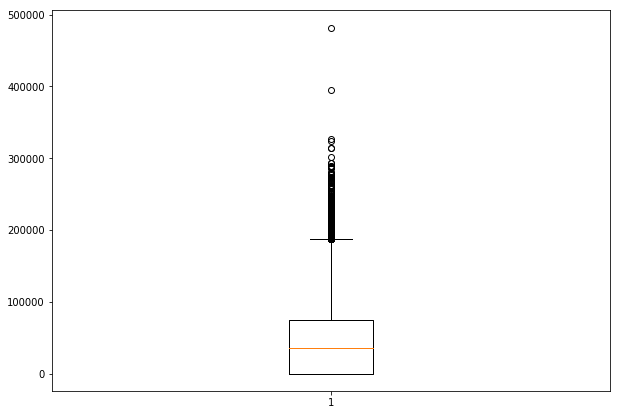

In [207]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(final_data["Loan Sanction Amount (USD)"])

# show plot
plt.show()

## Removing Outliers

In [209]:
quantile1, quantile3= np.percentile(final_data["Loan Sanction Amount (USD)"],[25,75])

In [210]:
print(quantile1,quantile3)

0.0 74779.2775


In [211]:
iqr_value=quantile3-quantile1
print(iqr_value)

74779.2775


In [212]:
lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)

In [213]:
print(lower_bound_val,upper_bound_val)

-112168.91625 186948.19374999998


In [216]:
final_data = final_data[final_data["Loan Sanction Amount (USD)"] <= upper_bound_val]

In [223]:
final_data.reset_index(drop=True, inplace=True)

In [259]:
X = final_data.drop(['Customer ID',"Loan Sanction Amount (USD)"],axis=1)
Y = final_data["Loan Sanction Amount (USD)"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [232]:
xgb_r_new = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [233]:
xgb_r_new.fit(X_train,y_train)

[16:06:12] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [234]:
y_pred = xgb_r_new.predict(X_test)
new_pred = []
for pred in y_pred:
    if pred<0:
        new_pred.append(0.0)
    else:
        new_pred.append(pred)
y_pred = new_pred

r2_score(y_test, y_pred)

0.7853749229152565

In [253]:
prediction_data

,Customer ID,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price
0,C-26247,47,3472.69,1,0,8,1,137088.98,396.72,0,0,799.14,2,843,3472.69,2,1,236644.50
1,C-35067,57,1184.84,1,6,3,0,104771.59,463.76,1,1,833.31,2,22,1184.84,0,1,142357.30
2,C-34590,52,1266.27,1,6,0,1,176684.91,493.15,0,1,627.44,2,1,1266.27,2,1,300991.24
3,C-16668,65,1369.72,0,2,11,0,97009.18,446.15,0,1,833.20,1,730,1369.72,1,0,125612.10
4,C-12196,60,1939.23,0,2,8,2,109980.00,370.10,0,0,739.30,0,356,1939.23,1,1,180908.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,19,1349.60,1,0,17,1,156766.97,500.59,1,1,684.32,1,681,1349.60,1,1,212778.00
19996,C-17587,22,2019.78,1,6,6,2,47924.80,243.02,1,1,706.34,1,213,2019.78,2,1,90816.95
19997,C-46479,19,2252.03,1,6,0,1,18629.88,101.88,1,0,656.46,1,270,2252.03,0,0,21566.27
19998,C-3099,21,1845.35,1,6,1,1,95430.73,271.31,0,1,865.46,2,489,1845.35,1,1,120281.17


In [255]:
new_data = prediction_data

In [256]:
new_data.set_index("Customer ID", inplace=True)

In [257]:
new_data

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Credit Score,Has Active Credit Card,Property ID,Property Age,Property Location,Co-Applicant,Property Price
Customer ID,,,,,,,,,,,,,,,,,
C-26247,47,3472.69,1,0,8,1,137088.98,396.72,0,0,799.14,2,843,3472.69,2,1,236644.50
C-35067,57,1184.84,1,6,3,0,104771.59,463.76,1,1,833.31,2,22,1184.84,0,1,142357.30
C-34590,52,1266.27,1,6,0,1,176684.91,493.15,0,1,627.44,2,1,1266.27,2,1,300991.24
C-16668,65,1369.72,0,2,11,0,97009.18,446.15,0,1,833.20,1,730,1369.72,1,0,125612.10
C-12196,60,1939.23,0,2,8,2,109980.00,370.10,0,0,739.30,0,356,1939.23,1,1,180908.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C-9076,19,1349.60,1,0,17,1,156766.97,500.59,1,1,684.32,1,681,1349.60,1,1,212778.00
C-17587,22,2019.78,1,6,6,2,47924.80,243.02,1,1,706.34,1,213,2019.78,2,1,90816.95
C-46479,19,2252.03,1,6,0,1,18629.88,101.88,1,0,656.46,1,270,2252.03,0,0,21566.27


In [260]:
xgb_r_new.fit(X,Y)

[12:35:53] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [261]:
final_prediction = xgb_r_new.predict(new_data)
new_pred = []
for pred in final_prediction:
    if pred<0:
        new_pred.append(0.0)
    else:
        new_pred.append(pred)
final_prediction = new_pred

In [262]:
final_prediction

[89791.266,
 63985.324,
 1959.1975,
 44463.69,
 64152.14,
 0.0,
 88650.26,
 77485.03,
 0.0,
 15277.816,
 78661.48,
 2137.7131,
 112858.195,
 15312.065,
 42309.22,
 147121.98,
 7333.4053,
 56456.664,
 40405.223,
 63475.82,
 22482.125,
 54616.348,
 72385.0,
 38938.293,
 130828.125,
 3017.392,
 79955.7,
 65039.79,
 0.0,
 102403.305,
 109332.07,
 42649.695,
 59722.32,
 65162.457,
 8178.179,
 52757.766,
 32864.477,
 49431.996,
 20294.463,
 35167.16,
 61786.594,
 21810.531,
 45415.63,
 52781.17,
 102403.305,
 67960.766,
 130.95741,
 12341.455,
 47582.14,
 19348.52,
 70605.73,
 22587.295,
 1428.2874,
 99862.98,
 18203.531,
 33282.746,
 42875.543,
 20632.805,
 6393.9287,
 26981.047,
 64698.36,
 68513.805,
 15312.065,
 64066.695,
 26831.459,
 78377.26,
 67960.766,
 25808.777,
 308.00143,
 89760.58,
 40156.543,
 39600.508,
 112858.195,
 85299.695,
 22482.125,
 69218.62,
 35136.97,
 63436.88,
 47833.043,
 140988.86,
 55259.906,
 80325.13,
 21739.652,
 0.0,
 9532.836,
 62912.562,
 39549.48,
 15990

In [290]:
result = zip(list(prediction_data.index),final_prediction)

In [269]:
list(result)

[('C-26247', 89791.266),
 ('C-35067', 63985.324),
 ('C-34590', 1959.1975),
 ('C-16668', 44463.69),
 ('C-12196', 64152.14),
 ('C-2600', 0.0),
 ('C-9047', 88650.26),
 ('C-2206', 77485.03),
 ('C-25607', 0.0),
 ('C-11606', 15277.816),
 ('C-3624', 78661.48),
 ('C-43027', 2137.7131),
 ('C-15190', 112858.195),
 ('C-25816', 15312.065),
 ('C-26370', 42309.22),
 ('C-1281', 147121.98),
 ('C-29433', 7333.4053),
 ('C-36256', 56456.664),
 ('C-34217', 40405.223),
 ('C-39950', 63475.82),
 ('C-6756', 22482.125),
 ('C-26652', 54616.348),
 ('C-3991', 72385.0),
 ('C-40312', 38938.293),
 ('C-24580', 130828.125),
 ('C-4949', 3017.392),
 ('C-18783', 79955.7),
 ('C-39205', 65039.79),
 ('C-23784', 0.0),
 ('C-39508', 102403.305),
 ('C-19062', 109332.07),
 ('C-48140', 42649.695),
 ('C-11314', 59722.32),
 ('C-766', 65162.457),
 ('C-39319', 8178.179),
 ('C-15299', 52757.766),
 ('C-10298', 32864.477),
 ('C-25573', 49431.996),
 ('C-18750', 20294.463),
 ('C-19298', 35167.16),
 ('C-11497', 61786.594),
 ('C-42250', 218

In [293]:
submission_df = pd.DataFrame.from_records(results, columns =["Customer ID", "Loan Sanction Amount (USD)"])

In [294]:
submission_df

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,89791.265625
1,C-35067,63985.324219
2,C-34590,1959.197510
3,C-16668,44463.691406
4,C-12196,64152.140625
...,...,...
19995,C-9076,90040.507812
19996,C-17587,29021.101562
19997,C-46479,601.589355
19998,C-3099,66321.500000


In [296]:
submission_df["Loan Sanction Amount (USD)"] = submission_df["Loan Sanction Amount (USD)"].round(decimals=2)

In [299]:
submission_df.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,89791.27
1,C-35067,63985.32
2,C-34590,1959.20
3,C-16668,44463.69
4,C-12196,64152.14


## Final DataFrame to CSV conversion

In [298]:
submission_df.to_csv("submission.csv",index=False)